In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1))

In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [ ]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
breast_dataset.shape

(569, 31)

In [ ]:
X = breast_dataset.values[:,0:30]
print('X =', X[0:5])

X = [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2

In [ ]:
Y = breast_dataset.values[:,30]
print('Y =', Y[0:5])

Y = [0. 0. 0. 0. 0.]


In [ ]:
# Using logistic regression classifer over the the different numbers of principal components.

Prin_Comp = []
Precision_0 = []
Precision_1 = []
Recall_0 = []
Recall_1 = []
Accuracy = []
max_accuracy = 0
high_comp = 0

N_Comp = range(1,30)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = LogisticRegression(solver = 'liblinear')
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Accuracy.append(data.values[0,2])
    if data.values[0,2] > max_accuracy:
        high_comp = N
        max_accuracy = data.values[0,2]
        
# Latest Confusion Matrix and Classification Report
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[43  4]
 [ 1 66]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.91      0.95        47
         1.0       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print("The N of principal components with the highest accuracy is:", high_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 23 components with the accuracy of 0.9736842105263158


Using Logistic Regression:


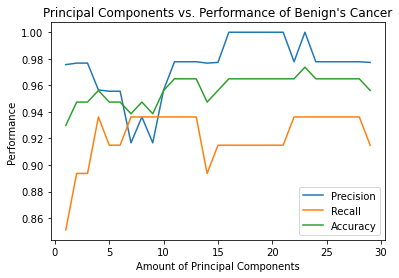

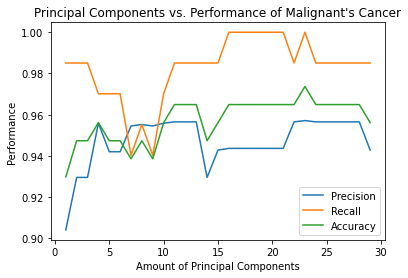

In [ ]:
print("Using Logistic Regression:")
plt.plot(Prin_Comp, Precision_0, label = "Precision")
plt.plot(Prin_Comp, Recall_0, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Benign's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()
plt.plot(Prin_Comp, Precision_1, label = "Precision")
plt.plot(Prin_Comp, Recall_1, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Malignant's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [ ]:
# Using PCA feature extraction to simplify the features.  
pca = PCA(n_components = 10)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['1','2','3','4','5','6','7','8','9','10'])
#,'11','12','13','14','15'])
principalDF.head()

,1,2,3,4,5,6,7,8,9,10
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502


In [ ]:
# Splitting the datasets to training and validation sets.

X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 10) (114, 10) (455,) (114,)


In [ ]:
# Feature scaling between 0 and 1 for independent variables using Standardization.


sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

In [ ]:
print('New X_train =', X_train_sc[0:5])

New X_train = [[-0.88568257 -0.40583219  0.39750989  0.33360589 -0.82403734  0.79717288
   1.36486082  0.93326731  0.37094003  0.63542118]
 [-0.71552247 -0.55110359  0.2621112  -0.81275164 -0.99567678  1.61036554
   0.43205142 -0.11031695 -0.69576898  0.11803613]
 [ 0.19358313  1.02938885 -0.94593214  0.69047135  0.91199831 -0.05307128
   0.21796358 -0.46967881 -0.37321323  0.21184242]
 [-0.63876355  0.30664196  0.30820425  0.44447528  0.05508024 -0.90020891
  -0.73136923  0.77187283 -0.15680726  0.40727644]
 [-0.46747526 -0.30053312 -0.16289155 -0.7795932  -0.91315631  0.80585734
   0.37304117 -1.08723135 -0.39521306 -0.06307839]]


In [ ]:
# Problem #2
# Construct the logistic regression's report and confusion matrix
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
matrix = confusion_matrix(Y_test, predicted)
report = classification_report(Y_test, predicted)
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n",report)

Confusion Matrix: 
 [[44  3]
 [ 2 65]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Problem #3
# Constructing the Naive Bayes's report and confusion matrix. 
model = GaussianNB()
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
print("Confusion Matrix: \n", metrics.confusion_matrix(Y_test, predicted))
print("\n")
print("Classification Report: \n", metrics.classification_report(Y_test, predicted))

Confusion Matrix: 
 [[42  5]
 [10 57]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        47
         1.0       0.92      0.85      0.88        67

    accuracy                           0.87       114
   macro avg       0.86      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [ ]:
# Using logistic regression classifer over the the different numbers of principal components.

Prin_Comp = []
Precision_0 = []
Precision_1 = []
Recall_0 = []
Recall_1 = []
Accuracy = []
max_accuracy = 0
high_comp = 0

N_Comp = range(1,30)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = GaussianNB()
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    matrix = confusion_matrix(Y_test, predicted)
    report = classification_report(Y_test, predicted)
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    Precision_0.append(data.values[0,0])
    Precision_1.append(data.values[0,1])
    Recall_0.append(data.values[1,0])
    Recall_1.append(data.values[1,1])
    Accuracy.append(data.values[0,2])
    if data.values[0,2] > max_accuracy:
        high_comp = N
        max_accuracy = data.values[0,2]
        
# Latest Confusion Matrix and Classification Report
print("Confusion Matrix: \n",matrix)
print("\n")
print("Classification Report: \n", report)

Confusion Matrix: 
 [[42  5]
 [ 9 58]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.86        47
         1.0       0.92      0.87      0.89        67

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



In [ ]:
print("The N of principal components with the highest accuracy is:", high_comp, "components with the accuracy of", max_accuracy)

The N of principal components with the highest accuracy is: 1 components with the accuracy of 0.9298245614035088


Using Gaussian Naive Bayes Classifier:


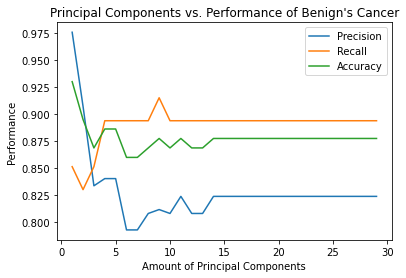

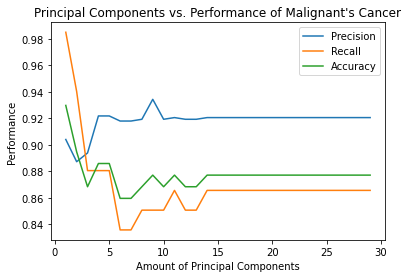

In [ ]:
print("Using Gaussian Naive Bayes Classifier:")
plt.plot(Prin_Comp, Precision_0, label = "Precision")
plt.plot(Prin_Comp, Recall_0, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Benign's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()
plt.plot(Prin_Comp, Precision_1, label = "Precision")
plt.plot(Prin_Comp, Recall_1, label = "Recall")
plt.plot(Prin_Comp, Accuracy, label = "Accuracy")
plt.title("Principal Components vs. Performance of Malignant's Cancer")
plt.xlabel("Amount of Principal Components")
plt.ylabel("Performance")
plt.legend()
plt.show()